## Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import warnings

In [2]:
warnings.filterwarnings('ignore')

## Data understanding

In [3]:
data = pd.read_csv('CarPrice_Assignment.csv')
data.shape

(205, 26)

In [4]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data cleaning

In [6]:
data['CarCompany'] = data['CarName'].apply(lambda x: x.split(' ')[0])
data['CarCompany'] = data['CarCompany'].apply(lambda x: 'volkswagen' if x == 'vw' or x == 'vokswagen' else x)

In [7]:
data = data.drop(columns=['CarName', 'car_ID'], axis=1)

In [8]:
data['symboling'] = data['symboling'].astype('object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

## Basic EDA

In [10]:
categorical_vars = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 
                    'enginetype', 'cylindernumber', 'fuelsystem', 'CarCompany']

numerical_vars = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
                 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']

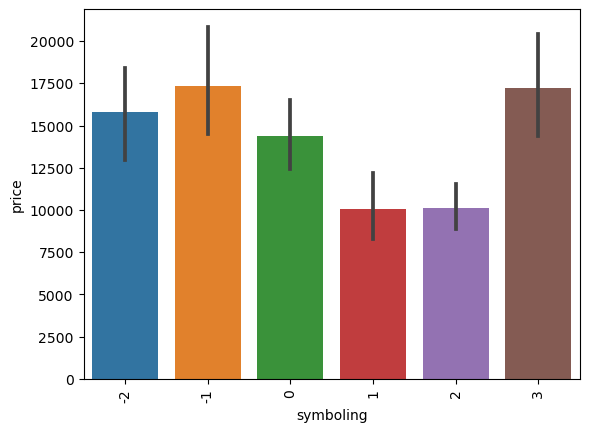

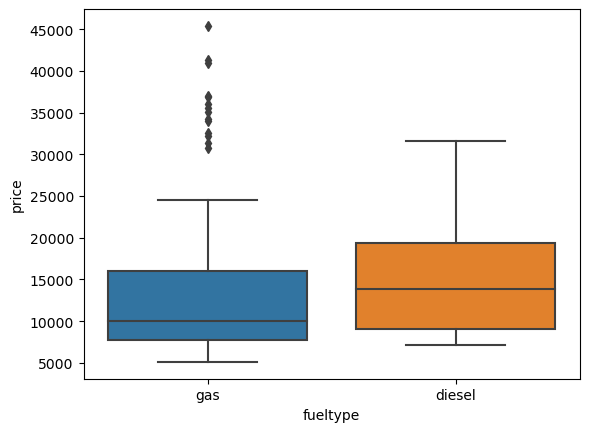

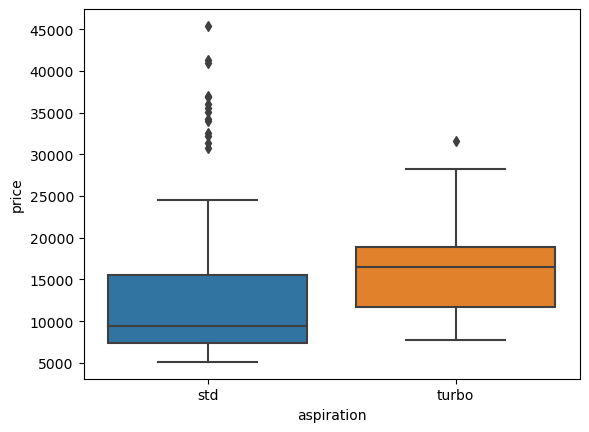

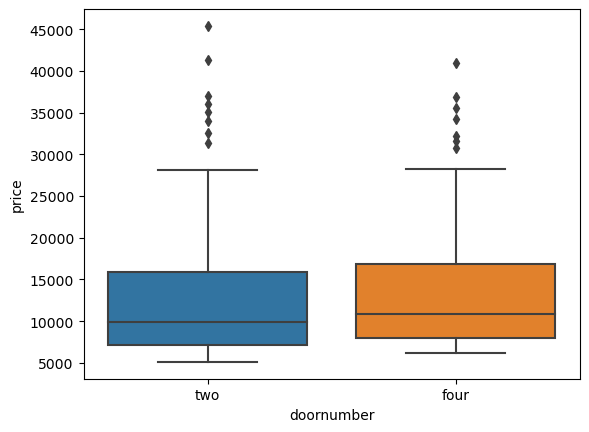

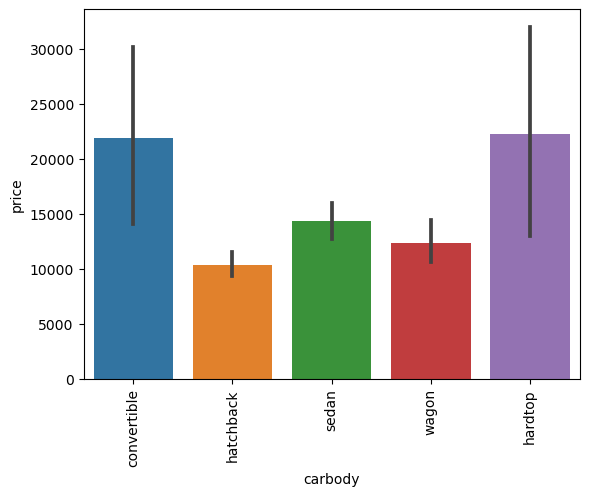

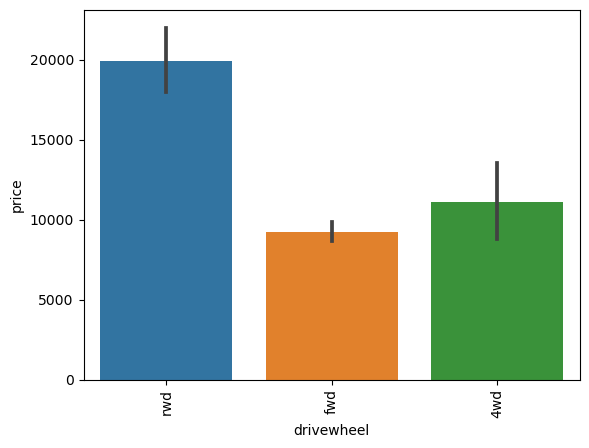

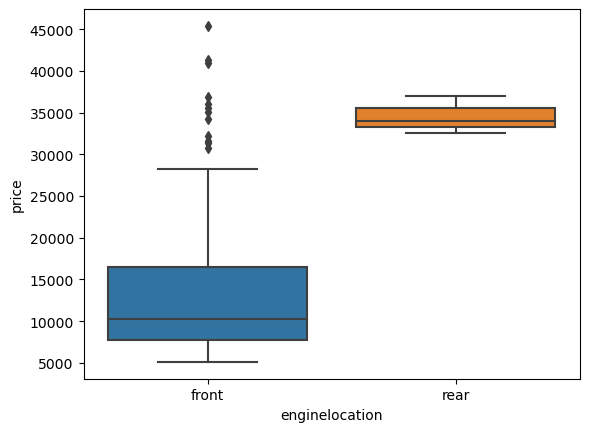

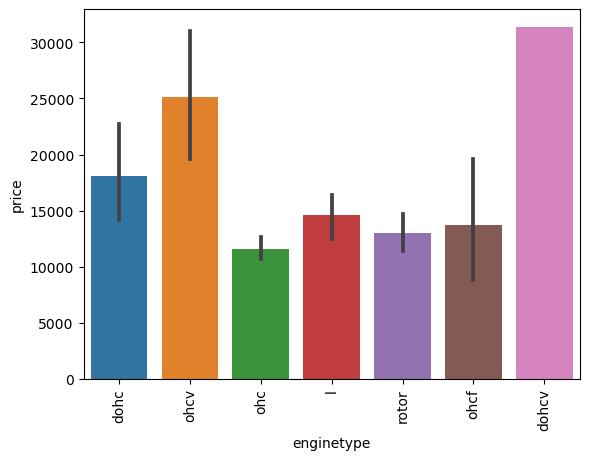

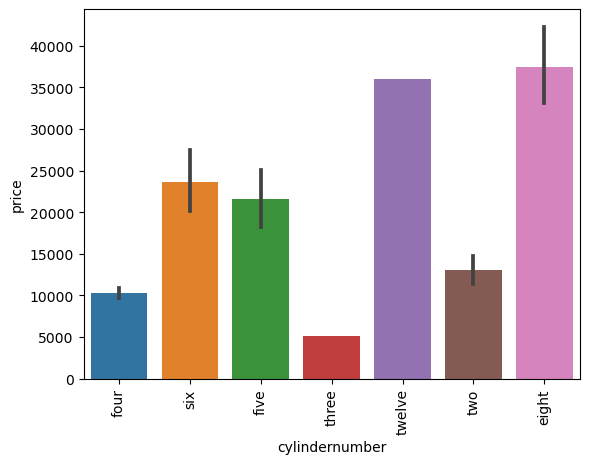

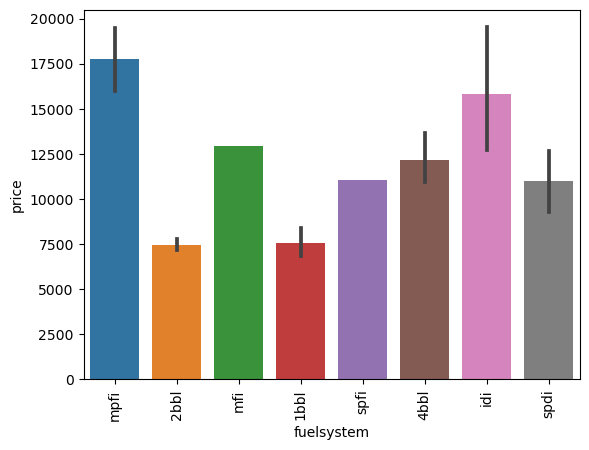

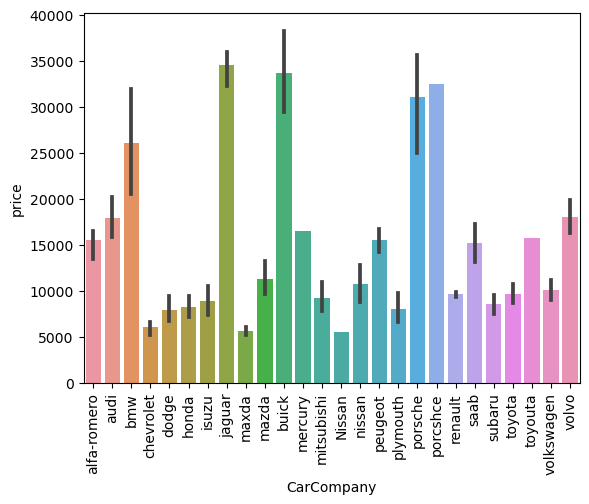

In [11]:
for col in categorical_vars:
    if len(data[col].unique()) == 2:
        sns.boxplot(x=data[col], y=data['price'])
    else:
        sns.barplot(x=data[col], y=data['price'])
        plt.xticks(rotation=90)
    plt.show()

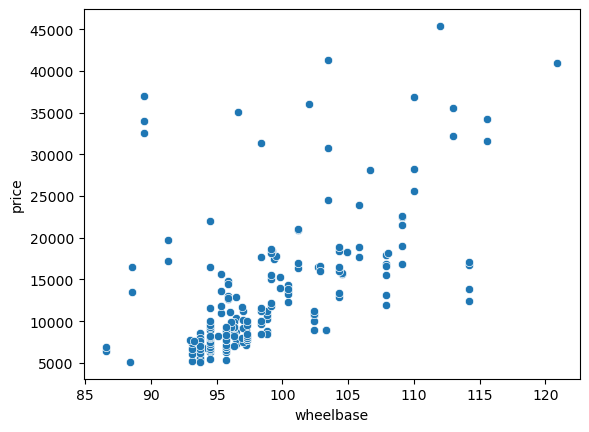

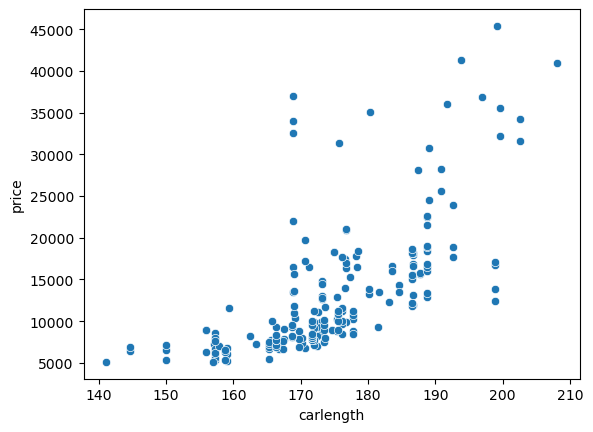

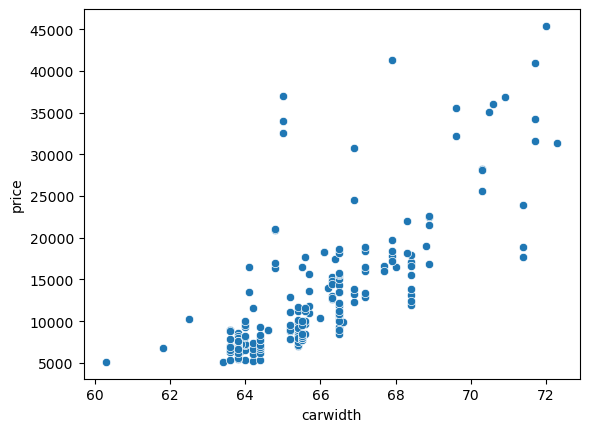

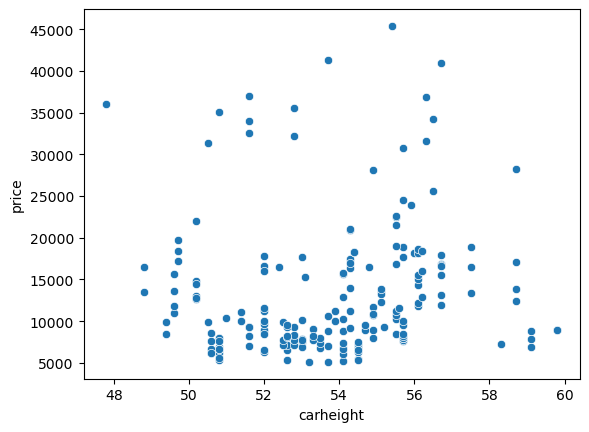

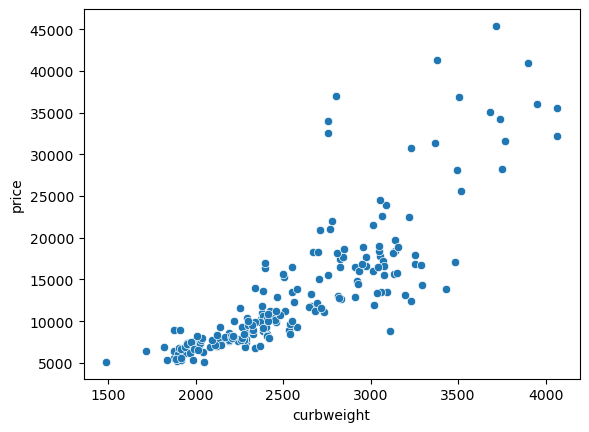

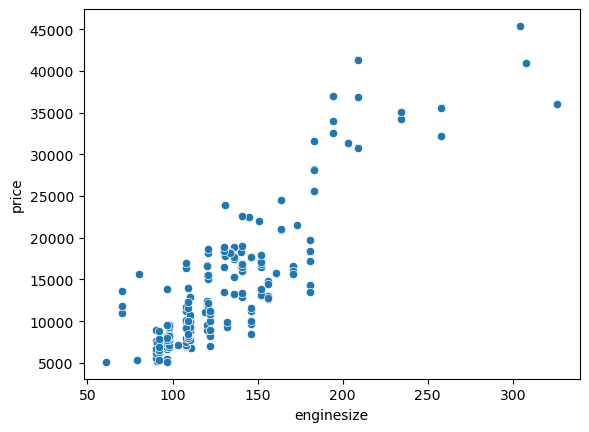

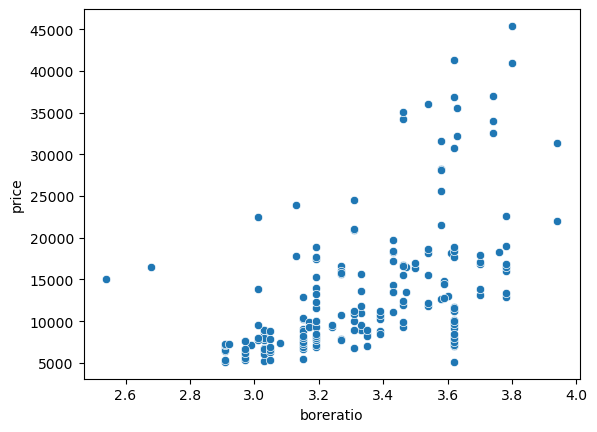

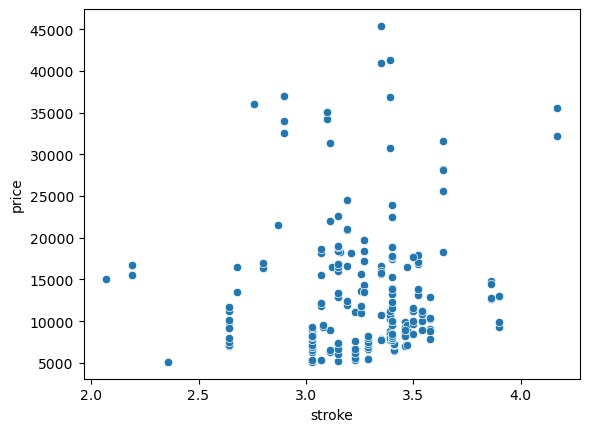

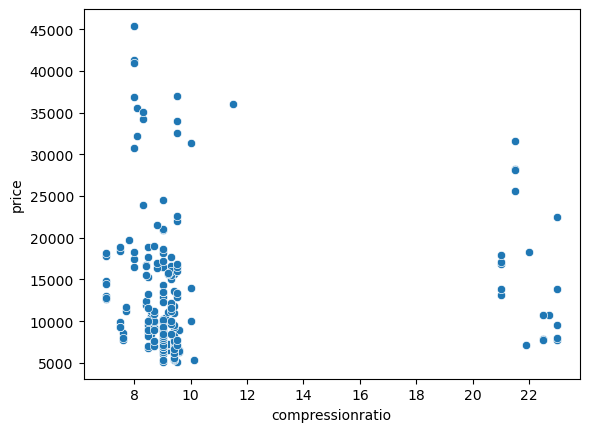

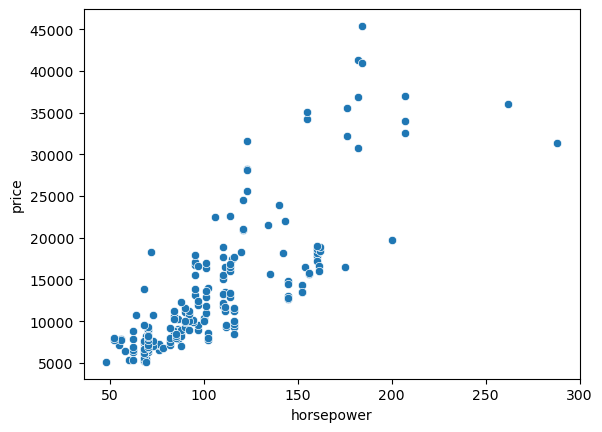

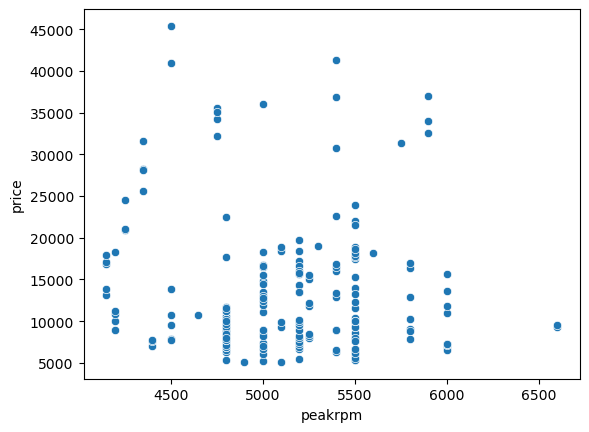

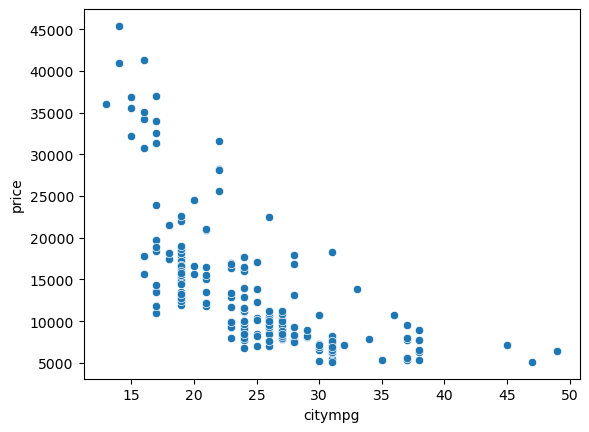

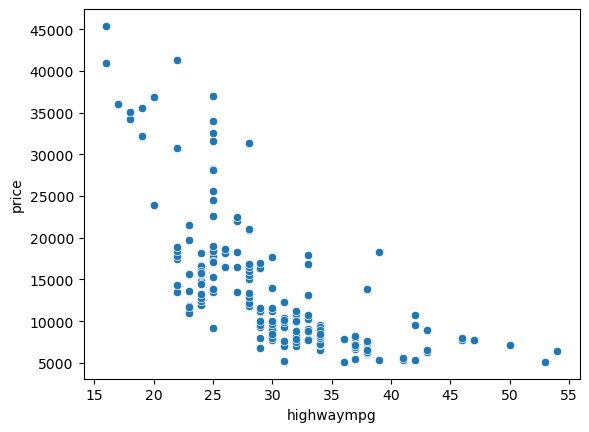

In [12]:
for col in numerical_vars:
    sns.scatterplot(x=data[col], y=data['price'])
    plt.show()

In [13]:
numerical_vars.append('price')

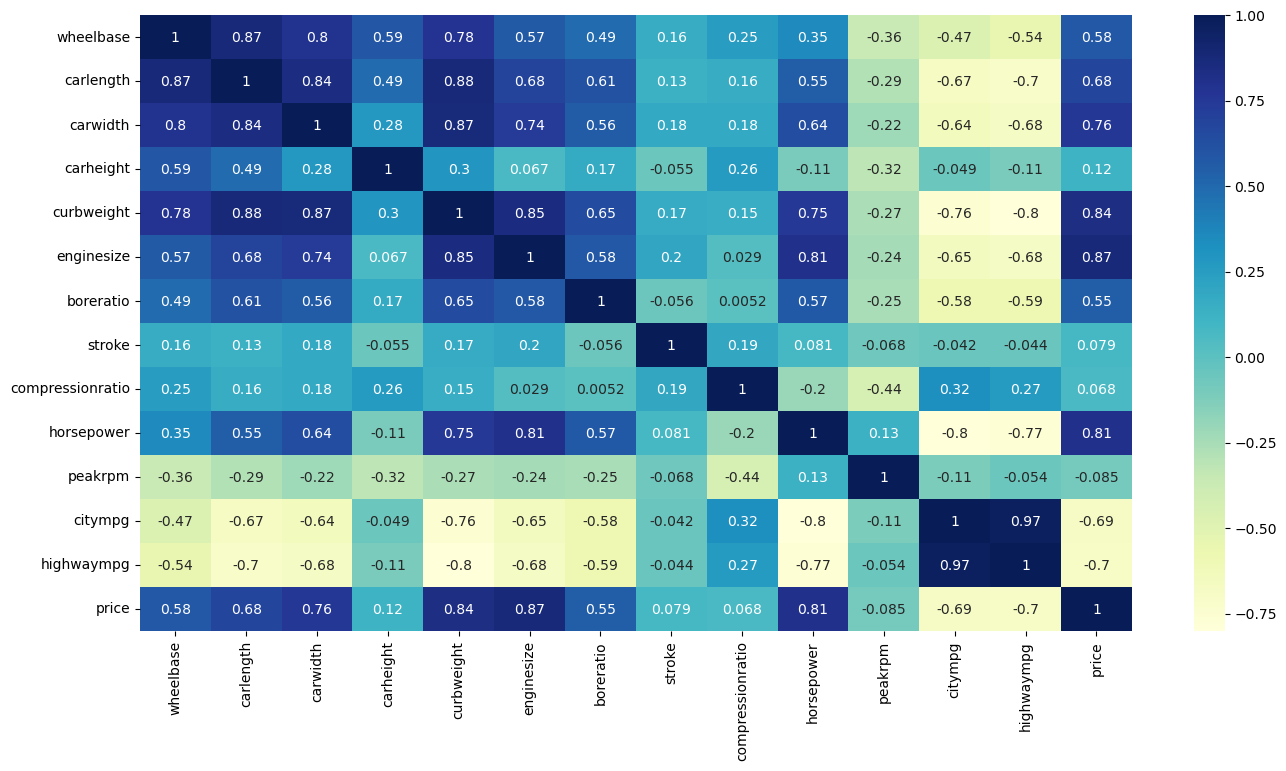

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(data[numerical_vars].corr(), annot=True, cmap='YlGnBu')
plt.show()

## Data preparation

In [15]:
data = pd.get_dummies(data, columns=categorical_vars, drop_first=True, dtype='int32')

In [16]:
train_data, test_data = train_test_split(data, train_size=0.7, test_size=0.3, random_state=100)
print(train_data.shape)
print(test_data.shape)

(143, 73)
(62, 73)


In [17]:
scaler = MinMaxScaler()
train_data[numerical_vars] = scaler.fit_transform(train_data[numerical_vars])

In [18]:
train_data[numerical_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,0.497946,0.535389,0.190787,0.227302,0.400029,0.344211,0.374976,0.219310
std,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,0.207140,0.157843,0.237181,0.165511,0.196438,0.186165,0.188477,0.215682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,0.305556,0.464646,0.100000,0.091667,0.265306,0.166667,0.216216,0.067298
50%,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,0.500000,0.545455,0.125000,0.191667,0.428571,0.333333,0.378378,0.140343
75%,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,0.682540,0.611111,0.150000,0.283333,0.551020,0.500000,0.527027,0.313479
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])

In [20]:
test_data[numerical_vars].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,0.393351,0.328405,0.363993,0.239439
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,0.192092,0.172009,0.181845,0.233076
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,0.000000,0.027778,-0.027027,0.007763
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,0.265306,0.166667,0.216216,0.092342
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,0.346939,0.305556,0.351351,0.158991
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,0.540816,0.444444,0.459459,0.317243
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,1.000000,0.694444,0.810811,1.112855


## Linear model

In [21]:
X_train = train_data.drop(columns=['price'], axis=1)
y_train = train_data['price']
X_test = test_data.drop(columns=['price'], axis=1)
y_test = test_data['price']

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [23]:
y_train_pred = lm.predict(X_train)
train_acc = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred)**0.5

In [24]:
print('Train Accuracy: ', round(train_acc, 3))
print('Train RMSE:', round(train_rmse, 3))

Train Accuracy:  0.976
Train RMSE: 0.033


In [25]:
y_test_pred = lm.predict(X_test)
test_acc = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred)**0.5

In [26]:
print('Test Accuracy: ', round(test_acc, 3))
print('Test RMSE:', round(test_rmse, 3))

Test Accuracy:  0.818
Test RMSE: 0.099


In above linear model we can see that there is a huge drop in accuracy on test data. This is a clear case of Overfitting. We must remove this overfitting using Regularization techniques(Ridge & Lasso).

## Ridge model with cross validation

In [27]:
fold = KFold(n_splits=5, shuffle=True)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

cv = GridSearchCV(Ridge(), params, scoring='neg_mean_absolute_error', cv=fold, return_train_score=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [28]:
cv.best_params_

{'alpha': 0.5}

With Grid Search Cross Validation we can say that the best hyperparameter for Ridge regression is 0.6. Now we will build our ridge model with this hyperparameter.

In [29]:
rm = Ridge(alpha=0.6)
rm.fit(X_train, y_train)

Ridge(alpha=0.6)

In [30]:
rm.coef_

array([ 0.07710326,  0.02116096,  0.17581116, -0.03951648,  0.17413525,
        0.16710365,  0.03834534, -0.02313534, -0.01655973,  0.12011842,
        0.06389854,  0.01366144,  0.00140575,  0.03107226,  0.02774949,
        0.02023233,  0.01567126,  0.02929495, -0.02397508,  0.04312092,
        0.00203936, -0.01551413, -0.06638671, -0.05485642, -0.05882555,
       -0.01259903,  0.02479792,  0.12266953, -0.01326253, -0.0150428 ,
        0.04213393,  0.04880034, -0.00744222, -0.00906952, -0.09877821,
       -0.11493682, -0.03010114,  0.02639826, -0.00820241, -0.00906952,
        0.01375192, -0.03368415,  0.02397508,  0.        ,  0.01056722,
       -0.00979286,  0.        ,  0.03192428,  0.03879491,  0.17901513,
        0.13475043, -0.02408433, -0.04590754, -0.0223677 , -0.0094132 ,
        0.15086225, -0.02868839, -0.01579804,  0.        , -0.06603761,
       -0.03783099, -0.04144106, -0.03648993,  0.        ,  0.11597034,
       -0.05093062,  0.03956172, -0.07386919, -0.04290982, -0.06

In [31]:
y_train_pred = rm.predict(X_train)
train_acc = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred)**0.5

In [32]:
print('Train Accuracy: ', round(train_acc, 3))
print('Train RMSE:', round(train_rmse, 3))

Train Accuracy:  0.954
Train RMSE: 0.046


In [33]:
y_test_pred = rm.predict(X_test)
test_acc = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred)**0.5

In [34]:
print('Test Accuracy: ', round(test_acc, 3))
print('Test RMSE:', round(test_rmse, 3))

Test Accuracy:  0.911
Test RMSE: 0.069


## Validate assumptions of linear regression in the ridge model

In [35]:
err_term = y_train - y_train_pred

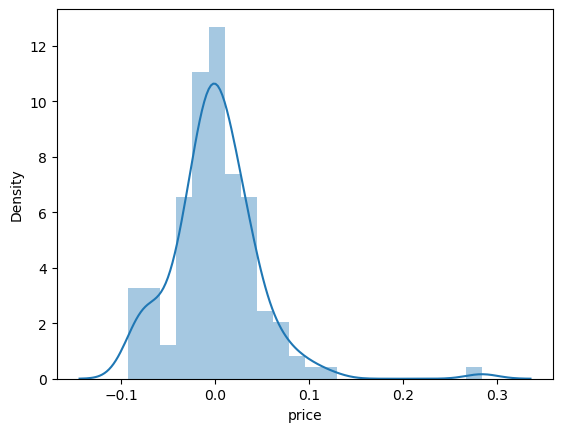

In [36]:
sns.distplot(err_term)
plt.show()

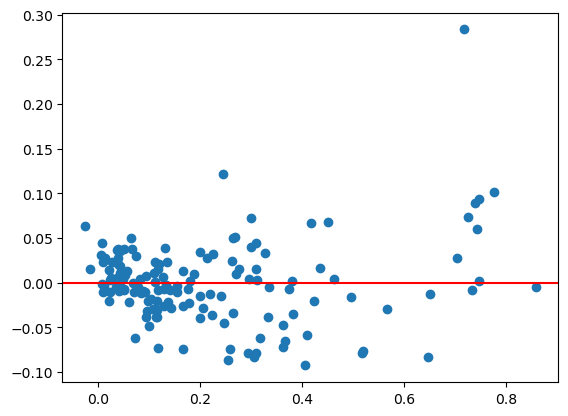

In [37]:
plt.scatter(y_train_pred, err_term)
plt.axhline(y=0, color='red')
plt.show()

## Lasso model with cross validation

In [38]:
fold = KFold(n_splits=5, shuffle=True)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

cv = GridSearchCV(Lasso(), params, scoring='neg_mean_absolute_error', cv=fold, return_train_score=True)
cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error')

In [39]:
cv.best_params_

{'alpha': 0.001}

With Grid Search Cross Validation we can say that the best hyperparameter for Ridge regression is 0.0001. Now we will build our ridge model with this hyperparameter.

In [40]:
lasm = Lasso(alpha=0.0001)
lasm.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [41]:
lasm.coef_

array([ 5.98698983e-02, -1.03170365e-01,  2.87636635e-01, -8.45389404e-02,
        3.21095687e-01,  5.88672017e-01, -7.80677145e-02, -6.39561585e-02,
       -0.00000000e+00,  0.00000000e+00,  1.53193861e-01,  1.38179686e-02,
        2.20536935e-02,  3.88542825e-02,  2.75844370e-03, -0.00000000e+00,
        1.72561890e-03,  0.00000000e+00, -2.77440109e-02,  5.83614034e-02,
       -1.28646786e-04, -4.19373760e-02, -5.85082789e-02, -4.26455251e-02,
       -3.42162152e-02, -6.75804488e-03,  8.83511581e-03,  3.03034083e-01,
       -2.68568792e-02, -0.00000000e+00,  5.00038656e-02,  3.48113036e-02,
       -2.28003308e-02,  7.23835764e-02, -1.09640451e-01, -7.02046288e-02,
       -7.79166585e-02,  1.10788552e-01, -2.21683088e-01,  0.00000000e+00,
        2.25120889e-02, -2.68175954e-02,  2.46956978e-06,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  8.91488502e-02,
        6.20916630e-02,  2.75335305e-01,  9.54621864e-02, -1.89316980e-02,
       -5.45884403e-02, -

In [42]:
y_train_pred = lasm.predict(X_train)
train_acc = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred)**0.5

In [43]:
print('Train Accuracy: ', round(train_acc, 3))
print('Train RMSE:', round(train_rmse, 3))

Train Accuracy:  0.969
Train RMSE: 0.038


In [44]:
y_test_pred = lasm.predict(X_test)
test_acc = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred)**0.5

In [45]:
print('Test Accuracy: ', round(test_acc, 3))
print('Test RMSE:', round(test_rmse, 3))

Test Accuracy:  0.928
Test RMSE: 0.062


## Validate assumptions of linear regression in the lasso model

In [46]:
err_term = y_train - y_train_pred

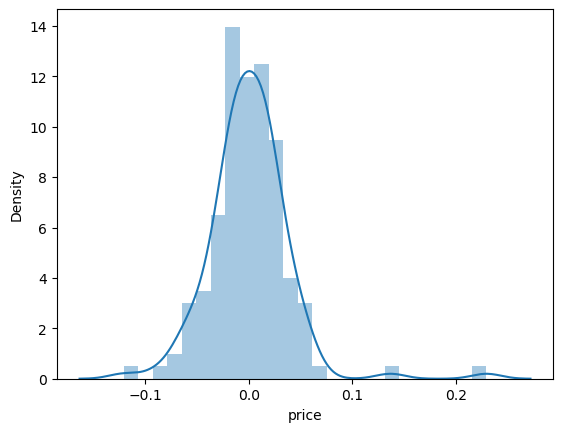

In [47]:
sns.distplot(err_term)
plt.show()

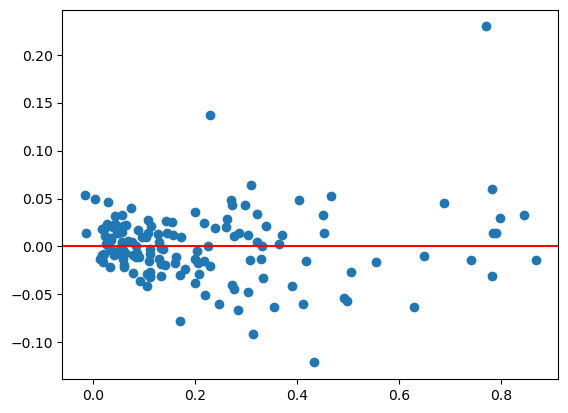

In [48]:
plt.scatter(y_train_pred, err_term)
plt.axhline(y=0, color='red')
plt.show()